In [1]:
pip install tensorflow

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [3]:
a=1
b=2
a+b

3

In [ ]:
dataf = pd.read_csv('ceramics_merged_cuboid.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataf = pd.read_csv('/content/drive/MyDrive/ME683/Final ML models and pickle files/cuboid/ceramics_merged_cuboid.csv')

In [7]:
dataf

rho        E     nu  a  b   c        f1            f2  \
0       13962.467  886.732  0.348  1  2   8  0.000000  0.000000e+00   
1        5719.151  559.265  0.292  1  2   8  0.000000  3.200000e-08   
2       12856.172  897.991  0.211  1  2   8  0.000000  0.000000e+00   
3       10157.064  887.202  0.155  1  2   8  0.000000  4.020000e-08   
4        3329.859  597.869  0.268  1  2   8  0.000000  0.000000e+00   
...           ...      ...    ... .. ..  ..       ...           ...   
243438   2151.352  314.716  0.235  4  9  10  0.634691  6.893482e-01   
243439  11170.836  262.672  0.150  4  9  10  0.971221  9.735789e-01   
243440   6081.633  138.751  0.357  4  9  10  0.973872  9.767765e-01   
243441   5484.809  642.002  0.346  4  9  10  0.766417  7.933862e-01   
243442   3428.839  217.837  0.274  4  9  10  0.915828  9.183564e-01   

                  f3            f4  ...       f21       f22       f23  \
0       0.000000e+00  9.520000e-08  ...  1.178788  1.274758  1.301000   
1       1.700000e-07  1.509996e-01  ...  1.644547  1.671376  1.675845   
2       6.480000e-08  1.520000e-07  ...  1.386432  1.402239  1.418806   
3       3.440000e-07  1.428715e-01  ...  1.574311  1.590799  1.632687   
4       0.000000e+00  0.000000e+00  ...  1.886973  2.028108  2.188986   
...              ...           ...  ...       ...       ...       ...   
243438  7.098019e-01  7.271838e-01  ...  1.116373  1.119968  1.127262   
243439  9.739448e-01  9.806567e-01  ...  1.008659  1.009808  1.011955   
243440  9.793068e-01  9.794873e-01  ...  1.012154  1.013722  1.013948   
243441  8.143778e-01  8.541225e-01  ...  1.075146  1.092821  1.100294   
243442  9.279056e-01  9.308893e-01  ...  1.037708  1.040815  1.041349   

             f24       f25       f26       f27       f28       f29       f30  
0       1.341759  1.362914  1.413474  1.436410  1.456206  1.461950  1.559695  
1       1.778290  1.802126  1.808714  1.809264  1.965531  1.981258  1.983373  
2       1.429915  1.524776  1.528230  1.530265  1.564059  1.682047  1.700771  
3       1.711357  1.712117  1.729015  1.778845  1.889687  1.934818  1.945951  
4       2.246763  2.263122  2.268006  2.423228  2.441292  2.450231  2.467057  
...          ...       ...       ...       ...       ...       ...       ...  
243438  1.133800  1.169416  1.177023  1.190304  1.221393  1.239906  1.264598  
243439  1.013167  1.017090  1.018890  1.019697  1.029475  1.029858  1.030280  
243440  1.016369  1.016478  1.017463  1.017641  1.021023  1.026127  1.026616  
243441  1.100404  1.132304  1.139402  1.152279  1.166639  1.179414  1.190321  
243442  1.046677  1.048012  1.057841  1.061120  1.067900  1.075832  1.078359  

[243443 rows x 36 columns]

In [8]:
X = dataf[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
dataf['E']=dataf['E']*10
dataf['nu']= dataf['nu']*10000

Y = dataf[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_split=0.1)

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 17s 910us/step - loss: 1909999.6250 - val_loss: 490552.5625
Epoch 2/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 858us/step - loss: 476822.3125 - val_loss: 444263.3438
Epoch 3/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 889us/step - loss: 453561.8125 - val_loss: 521238.9375
Epoch 4/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 876us/step - loss: 440752.5312 - val_loss: 414291.5625
Epoch 5/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 864us/step - loss: 428374.2812 - val_loss: 425694.9688
Epoch 6/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 884us/step - loss: 415171.8750 - val_loss: 392951.6875
Epoch 7/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 907us/step - loss: 399228.3125 - val_loss: 372039.9062
Epoch 8/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 883us/step - loss: 384418.8750 - val_loss: 391782.8438
Epoch 9/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 879us/step - loss: 365986.3750 - val_loss: 354561.3438
Epoch 10/1500
13557/13557 ━━━━━━━━━━━━━━━━━━━━ 12s 864

In [ ]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 10
results_df['Predicted_E'] /= 10
results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
Mean Squared Error for E: 21354.035211183153
Mean Squared Error for mu: 81733.88307683768
Median Percentage Error for E: 1.4079063055723966
Median Percentage Error for mu: 2.657089018485916
Mean Absolute Error for E: 9.895678776710088
Mean Absolute Error for mu: 0.01583379589041645
Standard Deviation for E: 10.754691721623544
Standard Deviation for mu: 0.023808875156654464
Mode Percentage Error for E: ModeResult(mode=0.003832818669375984, count=1) 
Mode Percentage Error for E: ModeResult(mode=0.0004927608944954129, count=1) 
Mean Absolute percentage Error for E: 2.3680584660476796
Mean Absolute percentage Error for mu: 6.0510153274335226
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      798.060   813.219055  15.159043      0.362      0.386554  0.024554   
1      446.854   445.739563   1.114449      0.424      0.401094  0.022906   
2      754.042   736.817993  17.224031      0.177      0.177467  0.000467   
3    

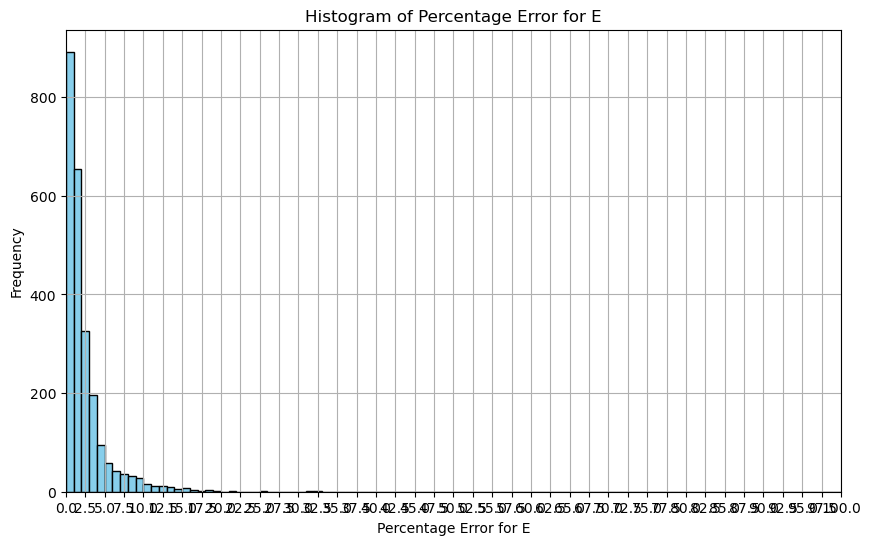

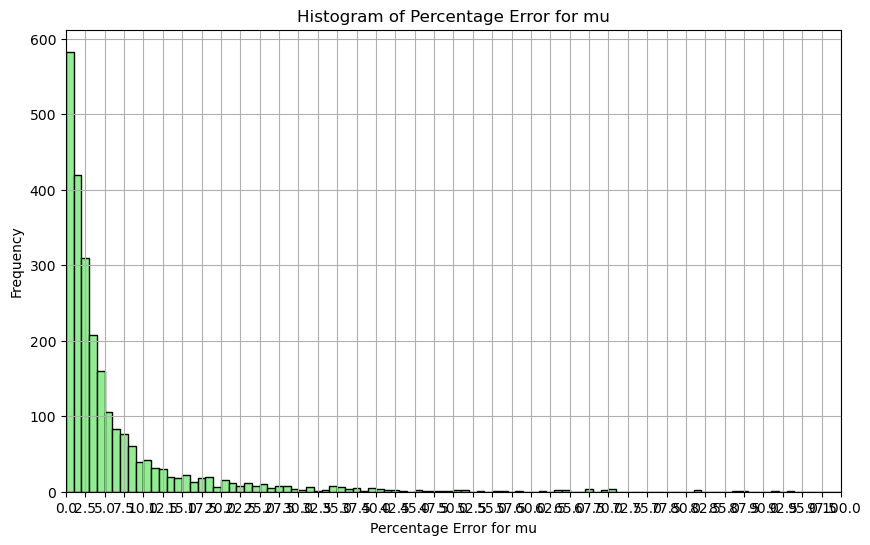

Maximum Percentage Error for E: 32.15307492406647
Minimum Percentage Error for E: 0.003832818669375984
Maximum Percentage Error for mu: 93.50103021978022
Minimum Percentage Error for mu: 0.0004927608944954129


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [11]:
import pickle

In [ ]:
model_file_pickle = "Ceramics_ANN_model_both_scaled_cuboid.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Load the model from the file
model_file_pickle= '/content/drive/MyDrive/ME683/Final ML models and pickle files/cuboid/ML_models/ANN models/pkl files/Ceramics_ANN_model_both_scaled_cuboid.pkl'
with open(model_file_pickle, 'rb') as file:
    model = pickle.load(file)

ModuleNotFoundError: No module named 'keras.src.models.sequential'

In [ ]:
y_pred1 = model.predict(X_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred1[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred1[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred1[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred1[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred1[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred1[:, 1])
})
results_df['Actual_E'] /= 10
results_df['Predicted_E'] /= 10
results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
Mean Squared Error for E: 21354.035211183153
Mean Squared Error for mu: 81733.88307683768
Median Percentage Error for E: 1.4079063055723966
Median Percentage Error for mu: 2.657089018485916
Mean Absolute Error for E: 9.895678776710088
Mean Absolute Error for mu: 0.01583379589041645
Standard Deviation for E: 10.754691721623544
Standard Deviation for mu: 0.023808875156654464
Mode Percentage Error for E: ModeResult(mode=0.003832818669375984, count=1) 
Mode Percentage Error for E: ModeResult(mode=0.0004927608944954129, count=1) 
Mean Absolute percentage Error for E: 2.3680584660476796
Mean Absolute percentage Error for mu: 6.0510153274335226
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      798.060   813.219055  15.159043      0.362      0.386554  0.024554   
1      446.854   445.739563   1.114449      0.424      0.401094  0.022906   
2      754.042   736.817993  17.224031      0.177      0.177467  0.000467   
3    

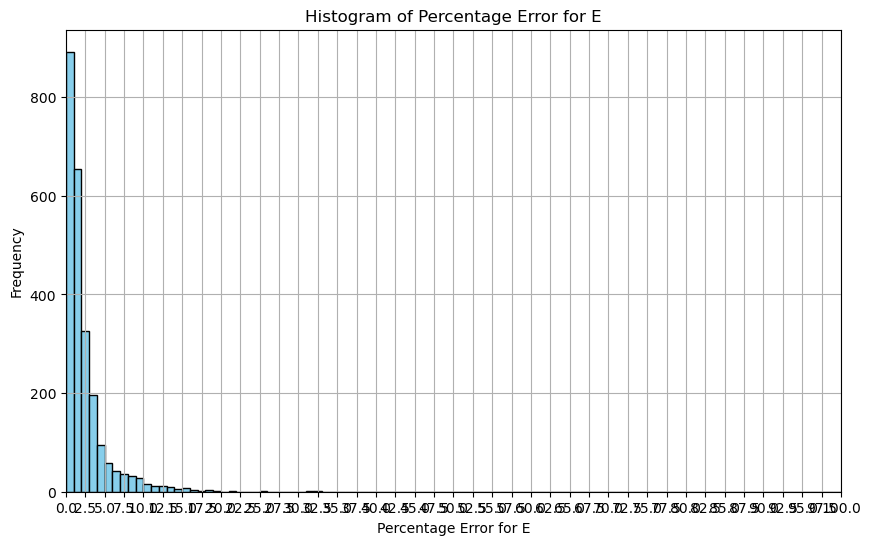

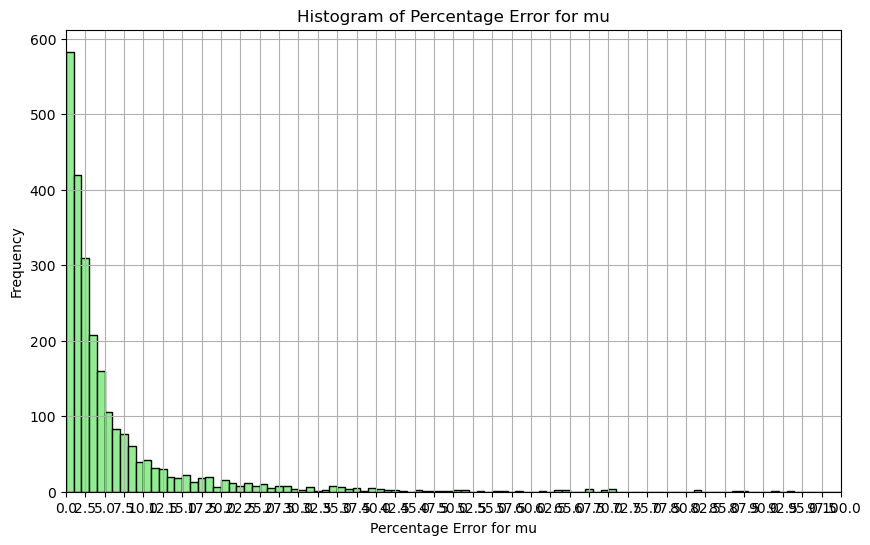

Maximum Percentage Error for E: 32.15307492406647
Minimum Percentage Error for E: 0.003832818669375984
Maximum Percentage Error for mu: 93.50103021978022
Minimum Percentage Error for mu: 0.0004927608944954129


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')